In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
nchan=512
chansize=0.05 #channel time in ns
irfshift=25
irfstdev=5
baseline=5.0 #this is photons per channel uniform background
#here are the species parameters (in ns and photon counts)
params=[{'tau':4.0,'amp':50000},
        {'tau':1.0,'amp':50000},
        {'tau':1.0,'amp':0}]

In [3]:
bins=np.arange(nchan+1)
xvals=np.arange(0,chansize*nchan,chansize)
simhists=[np.histogram(np.random.uniform(0,nchan,int(baseline*nchan)),bins=bins)[0]]
for i in range(len(params)):
    if(params[i]['amp']>0):
        irfshifts=np.random.normal(irfshift,irfstdev,size=int(params[i]['amp']))
        taushifts=np.random.exponential(params[i]['tau']/chansize,size=int(params[i]['amp']))
        simhists.append(np.histogram(irfshifts+taushifts,bins=bins)[0])
    else:
        simhists.append(np.zeros(nchan))
simhist=np.array(simhists).sum(axis=0)

In [4]:
irfsim=np.histogram(np.random.normal(irfshift,irfstdev,10000),bins=bins)[0]

Text(0, 0.5, 'Intensity (photons)')

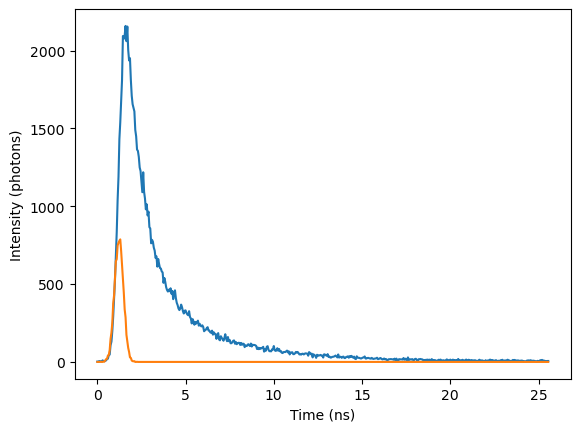

In [5]:
plt.plot(xvals,simhist)
plt.plot(xvals,irfsim)
plt.xlabel('Time (ns)')
plt.ylabel('Intensity (photons)')

In [6]:
pd.DataFrame({'time':xvals,'intensity':simhist,'irf':irfsim}).to_csv('sim_lifetime.csv')